In [7]:
import pandas as pd

In [8]:
inputdir = '../data/'
# 读取数据
train_data = pd.read_csv(f'{inputdir}loop_sensor_train.csv')


t_1h
2022-01-01 00:00:00    1712
2022-01-01 01:00:00    1710
2022-01-01 02:00:00    1708
2022-01-01 03:00:00    1715
2022-01-01 04:00:00    1715
                       ... 
2024-01-14 19:00:00    1443
2024-01-14 20:00:00    1438
2024-01-14 21:00:00    1425
2024-01-14 22:00:00    1432
2024-01-14 23:00:00    1430
Length: 15896, dtype: int64


In [14]:
unique_iu_ac_values = train_data['iu_ac'].nunique()
print("不同的iu_ac值的数量：", unique_iu_ac_values)

不同的iu_ac值的数量： 2030


In [15]:
# 检查每个时间戳 t_1h 有多少个相同的行
counts = train_data.groupby('t_1h').size()
# 打印结果
print(counts)   

t_1h
2022-01-01 00:00:00    1712
2022-01-01 01:00:00    1710
2022-01-01 02:00:00    1708
2022-01-01 03:00:00    1715
2022-01-01 04:00:00    1715
                       ... 
2024-01-14 19:00:00    1443
2024-01-14 20:00:00    1438
2024-01-14 21:00:00    1425
2024-01-14 22:00:00    1432
2024-01-14 23:00:00    1430
Length: 15896, dtype: int64


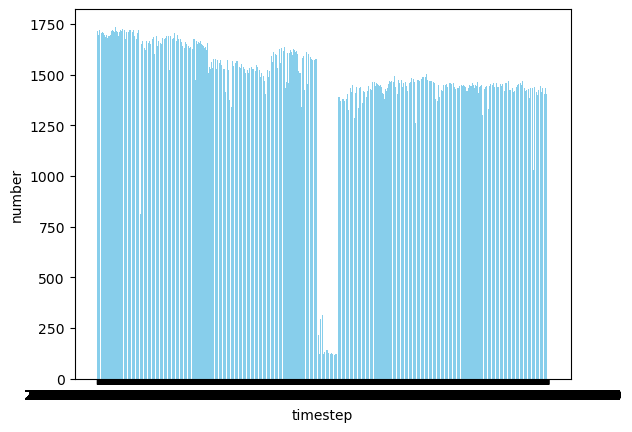

In [17]:
import matplotlib.pyplot as plt

counts = train_data.groupby('t_1h').size()

# 绘制柱状图
plt.bar(counts.index, counts.values, color='skyblue')

# 添加标题和标签
plt.xlabel('timestep')
plt.ylabel('number')

# 显示图形
plt.show()

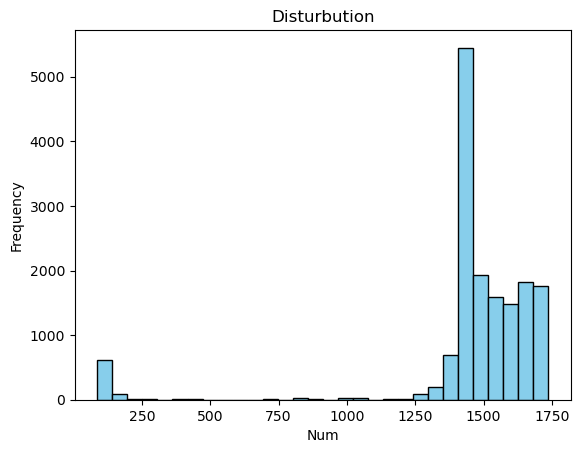

In [42]:
# 假设counts是之前使用groupby('t_1h').size()计算得到的Series
counts = train_data.groupby('t_1h').size()

# 绘制直方图
plt.hist(counts.values, bins=30, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Disturbution')
plt.xlabel('Num')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [43]:
# 假设counts是之前使用groupby('t_1h').size()计算得到的Series
counts = train_data.groupby('t_1h').size()

# 筛选数量小于1000的时间步
less_than_1000 = counts[counts < 1250]

# 计算满足条件的时间步数量
number_of_time_steps = less_than_1000.count()

print("数量小于1000的时间步总数:", number_of_time_steps)


数量小于1000的时间步总数: 867


In [9]:
# 按行数排序，显示最多行数的时间戳
sorted_counts = counts.sort_values(ascending=False)
print(sorted_counts)

t_1h
2022-01-28 00:00:00    1737
2022-02-12 13:00:00    1737
2022-01-27 15:00:00    1737
2022-01-28 10:00:00    1737
2022-01-28 05:00:00    1737
                       ... 
2022-12-28 13:00:00     113
2022-12-15 14:00:00     112
2022-12-31 19:00:00     112
2022-12-15 20:00:00     110
2023-11-07 19:00:00      86
Length: 15896, dtype: int64


In [10]:
# 按时间戳 t_1h 计算车流量 q 的平均值
sorted_counts.mean()

1455.2355938600906

In [11]:
# 计算每个行数出现的次数
frequency_of_counts = sorted_counts.value_counts()

In [12]:
# 使用 value_counts() 来查看哪个行数出现最频繁
mode_count = sorted_counts.value_counts().idxmax()
mode_frequency = frequency_of_counts.max()  # 这是众数出现的次数
# 打印结果
print(f"The most frequent row count is: {mode_count}, which appears {mode_frequency} times.")

The most frequent row count is: 1451, which appears 186 times.
